## 2.2 Beamforming σε πραγματικά σήματα

Α) Θεωρούμε τώρα μια συστοιχία Ν=7 μικροφώνων με απόσταση d = 4cm που βρίσκεται σε ένα θορυβώδες δωμάτιο και καταγράφει το σήμα φωνής που εκφωνεί ένας άνθρωπος σε γωνία θ = 45 μοιρών. Σε αυτή την περίπτωση ο θόρυβος είναι διάχυτος και έρχεται από όλες τις κατευθύνσεις, όχι από κάποια συγκεκριμένη γωνία.<br>
Αρχικά κάνουμε import τις απαραίτητες βιβλιοθήκες και φορτώνουμε τα σήματα της πηγής και των 7 αισθητήρων με συχνότητα 48kHz. Ενδεικτικά αναπαριστούμε το σήμα της πηγής και τα σήματα που καταγράφονται στους αισθητήρες με δείκτη 0 και 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy
import math
import cmath

<function matplotlib.pyplot.show(close=None, block=None)>

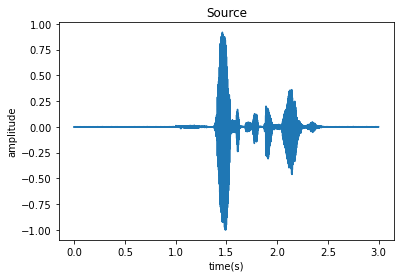

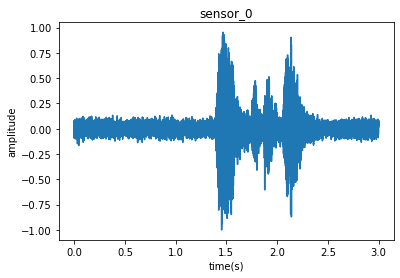

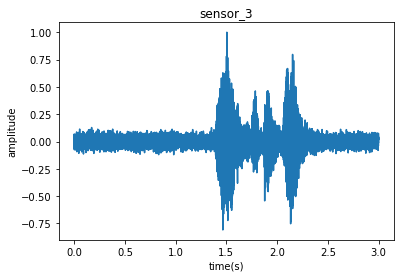

In [2]:
#A
#1
source, sr = librosa.load ("./Material/MicArrayRealSignals/source.wav",sr=48000)
sensor = []
for i in range(7):
    sensor.append([])
sensor[0], sr = librosa.load ("./Material/MicArrayRealSignals/sensor_0.wav",sr=48000)
sensor[1], sr = librosa.load ("./Material/MicArrayRealSignals/sensor_1.wav",sr=48000)
sensor[2], sr = librosa.load ("./Material/MicArrayRealSignals/sensor_2.wav",sr=48000)
sensor[3], sr = librosa.load ("./Material/MicArrayRealSignals/sensor_3.wav",sr=48000)
sensor[4], sr = librosa.load ("./Material/MicArrayRealSignals/sensor_4.wav",sr=48000)
sensor[5], sr = librosa.load ("./Material/MicArrayRealSignals/sensor_5.wav",sr=48000)
sensor[6], sr = librosa.load ("./Material/MicArrayRealSignals/sensor_6.wav",sr=48000)

plt.figure()
plt.title("Source")
t=np.linspace(0,len(source)//sr,len(source))
plt.plot(t,source)
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show

plt.figure()
plt.title("sensor_0")
t=np.linspace(0,len(sensor[0])//sr,len(sensor[0]))
plt.plot(t,sensor[0])
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show

plt.figure()
plt.title("sensor_3")
t=np.linspace(0,len(sensor[3])//sr,len(sensor[3]))
plt.plot(t,sensor[3])
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show

Με τον ίδιο τρόπο με την άσκηση 2.1 Α), υπολογίζουμε τις καθυστερήσεις και τα βάρη Ht και στη συνέχεια υπολογίζουμε την έξοδο του delay-and-sum beamformer.

In [3]:
d = 0.04
N = 7
theta_source = np.pi/4
theta_noise = np.pi - np.pi/4
c = 340
omega_s= 2*np.pi*sr
w = np.linspace(-np.pi,np.pi,len(sensor[0])) - 2*np.pi/len(sensor[0])

#calculating delays

tn_source = np.zeros(7)

for i in range(7):
    n = i
    tn_source[i] =  ((n-(N-1)/2)*d*np.cos(theta_source)) / c
   
    
#print(tn_source)


dn_ks = []  
H = []
for i in range(7):
    dn_ks.append([])
    H.append([])
    
for i in range(7):
    delay = tn_source[i]
    for j in range (len(w)):
        
        cmp = complex(0.0,-sr*w[j]*delay)
        dn_ks[i].append(cmath.exp(cmp))
        H[i].append(cmath.exp(cmp)/N)

#print(dn_ks)

#weights
dn=np.array(dn_ks)

H_arr=np.array(H)
Ht=np.transpose(H_arr)
print(Ht)

[[0.14255735+0.00925008j 0.14272388+0.00616912j 0.14282382+0.00308528j
  ... 0.14282382-0.00308528j 0.14272388-0.00616912j
  0.14255735-0.00925008j]
 [0.14255286+0.00931908j 0.14272188+0.00621517j 0.14282332+0.00310832j
  ... 0.14282332-0.00310832j 0.14272188-0.00621517j
  0.14255286-0.00931908j]
 [0.14254833+0.00938808j 0.14271987+0.00626122j 0.14282282+0.00313136j
  ... 0.14282282-0.00313136j 0.14271987-0.00626122j
  0.14254833-0.00938808j]
 ...
 [0.14253918-0.00952606j 0.1427158 -0.00635333j 0.1428218 -0.00317745j
  ... 0.1428218 +0.00317745j 0.1427158 +0.00635333j
  0.14253918+0.00952606j]
 [0.14254377-0.00945707j 0.14271784-0.00630728j 0.14282231-0.00315441j
  ... 0.14282231+0.00315441j 0.14271784+0.00630728j
  0.14254377+0.00945707j]
 [0.14254833-0.00938807j 0.14271987-0.00626122j 0.14282282-0.00313136j
  ... 0.14282282+0.00313136j 0.14271987+0.00626122j
  0.14254833+0.00938807j]]


C:\Users\30694\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


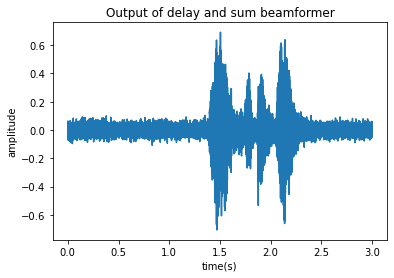

In [4]:
#fourier transforms
F = []
Y = []
y = []
for i in range(7):
    F.append([])
    Y.append([])
    y.append([])
for i in range(7):
    F[i]=scipy.fft.fft(sensor[i])

F_arr=np.array(F)


for i in range(7):
    Y[i]=(H_arr[i] * F[i])
    y[i]=scipy.fft.ifft(Y[i])



output= (y[0]+y[1]+y[2]+y[3]+y[4]+y[5]+y[6])
plt.figure()
plt.plot(t,output)
plt.title("Output of delay and sum beamformer")
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()



Η έξοδος του delay-and-sum beamformer αποθηκεύεται στο αρχείο real_ds.wav.

In [5]:
import soundfile as sf
sf.write('real_ds.wav', output.real, 48000)

2. Σχεδιάζουμε το σήμα της πηγής, το σήμα στην έξοδο του beamformer και το σήμα με θόρυβο στο κεντρικό μικρόφωνο:

C:\Users\30694\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


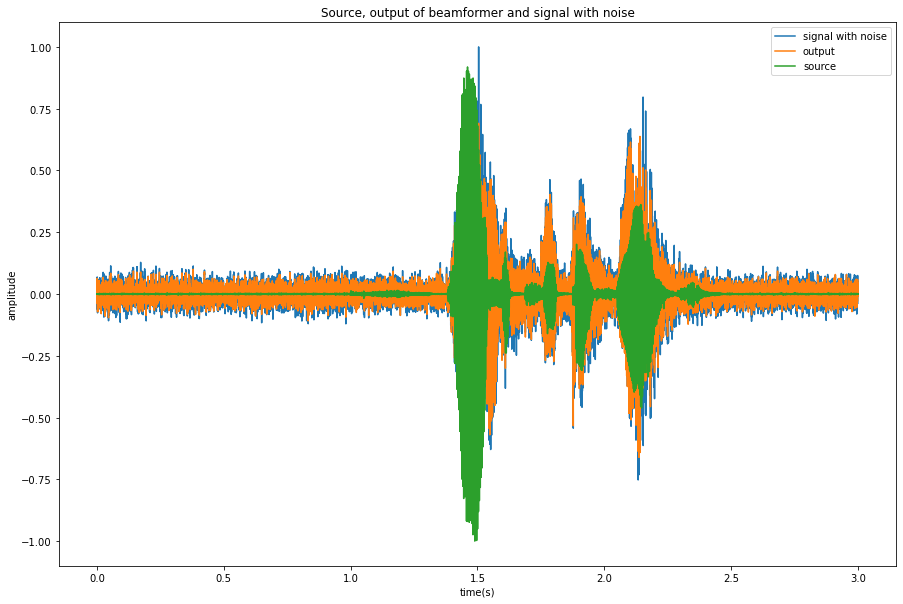

In [6]:
#2
plt.figure(figsize=(15,10))
plt.title("Source, output of beamformer and signal with noise")
plt.plot(t,sensor[3],label="signal with noise")
plt.plot(t,output,label="output")
plt.plot(t,source,label="source")

plt.legend()
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()

<ipython-input-7-3e90de6dd752>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, f1, np.log10(Sxx1), shading='flat')


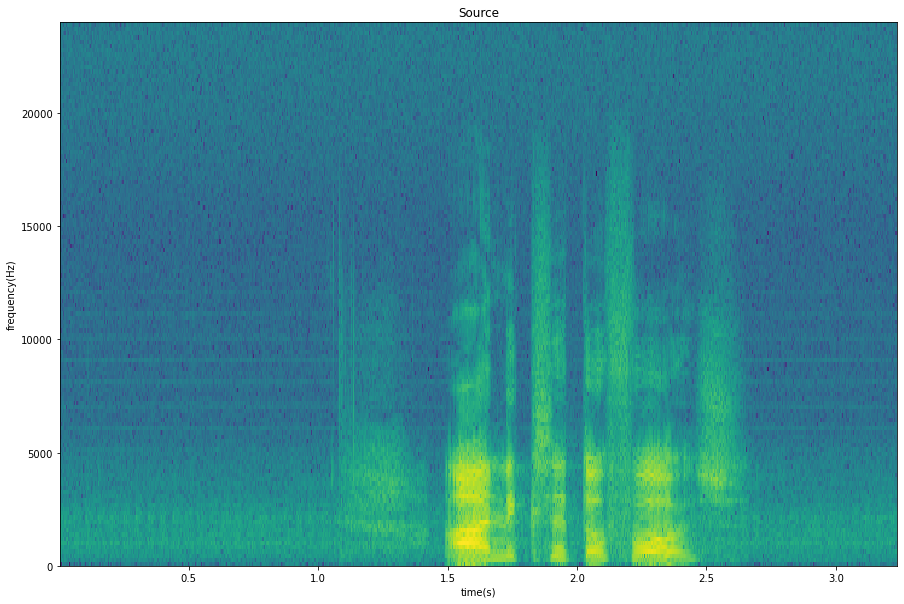

<ipython-input-7-3e90de6dd752>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t2, f2, np.log10(Sxx2), shading='flat')


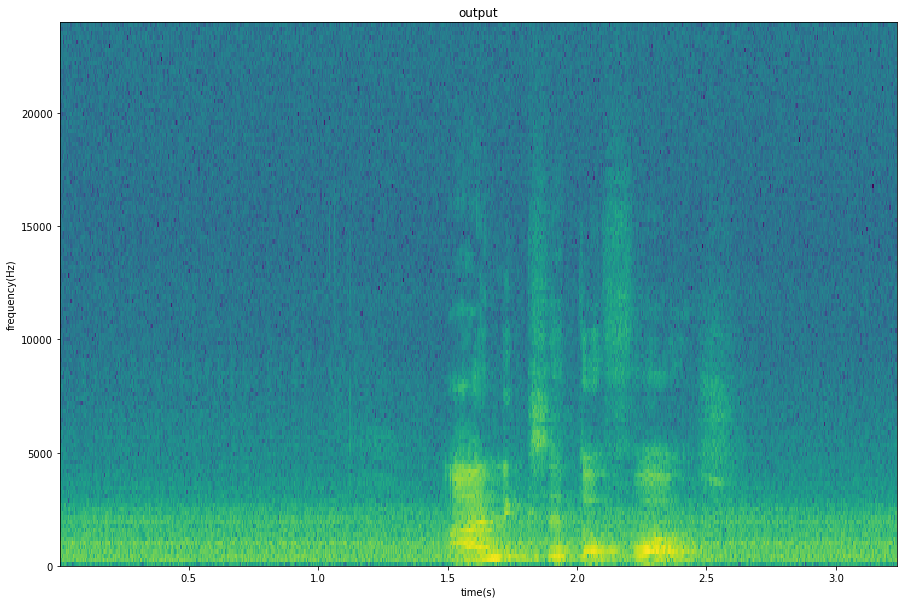

<ipython-input-7-3e90de6dd752>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t3, f3, np.log10(Sxx3), shading='flat')


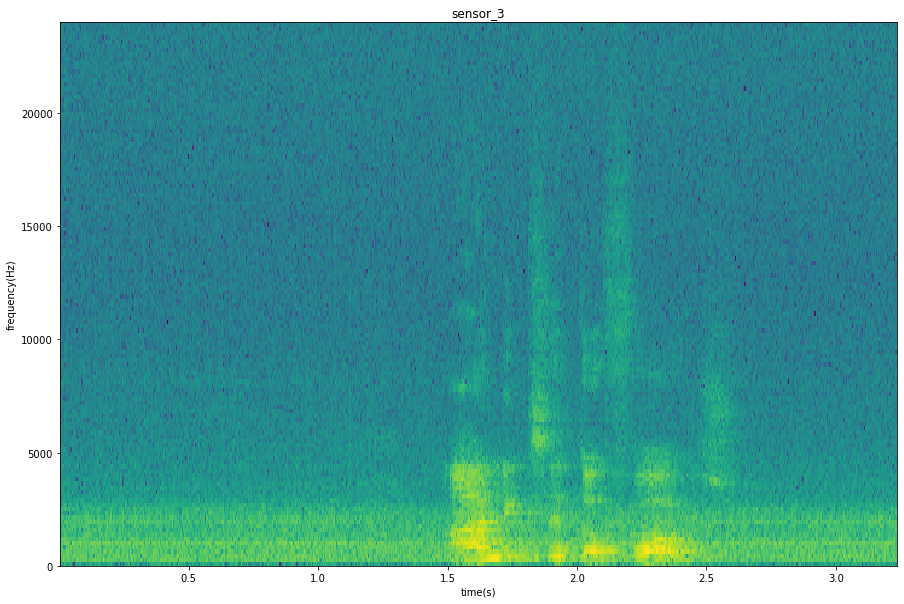

In [7]:
#spectrograms

plt.figure(figsize=(15,10))
f1, t1, Sxx1 = scipy.signal.spectrogram(source, sr)
plt.pcolormesh(t1, f1, np.log10(Sxx1), shading='flat')
plt.title("Source")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

plt.figure(figsize=(15,10))
f2, t2, Sxx2 = scipy.signal.spectrogram(output.real, sr)
plt.pcolormesh(t2, f2, np.log10(Sxx2), shading='flat')
plt.title("output")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

plt.figure(figsize=(15,10))
f3, t3, Sxx3 = scipy.signal.spectrogram(sensor[3], sr)
plt.pcolormesh(t3, f3, np.log10(Sxx3), shading='flat')
plt.title("sensor_3")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()


Βλέπουμε ότι το σήμα στην έξοδο του delay-and-sum beamformer έχει αρκετό θόρυβο, αν και παρουσιάζει μία μικρή βελτίωση σε σχέση με το σήμα στο κεντρικό μικρόφωνο. Αυτό συμβαίνει επειδή ο θόρυβος είναι διάχυτος και προέρχεται από όλες τις κατευθύνσεις, επομένως ο beamformer δε μπορεί να αποκλείσει τον θόρυβο που προέρχεται από την κατεύθυνση στην οποία εστιάζει.

3. Υπολογίζουμε το segmental SNR σύμφωνα με τις οδηγίες της εκφώνησης. Πρώτα απομονώνουμε ένα πλαίσιο 20 ms θορύβου από το σήμα του κεντρικού μικροφώνου και στη συνέχεια υπολογίζουμε το SSNR για τα σήματα στο κεντρικό μικρόφωνο και στην έξοδο του beamformer, χωρίζοντας το εκάστοτε σήμα σε πλαίσια 20 ms και υπολογίζοντας το snr τους. Αν το snr κάποιου τμήματος είναι πάνω από 35dB, τότε το τμήμα αυτό θεωρείται πολύ καθαρό και δεν έχει νόημα να προστεθεί κάποια τιμή μεγαλύτερη από 35, ενώ αν είναι αρνητικό, θεωρούμε ότι είναι μόνο θόρυβος και δεν το προσμετράμε. Έπειτα, προσθέτουμε τα snr όλων των πλαισίων και διαιρούμε με τον αριθμό των πλαισίων.

In [8]:
#3
window = 0.02 * sr #20 ms
begin = int(0.2*sr)
end = int(0.2*sr+window)-1
noise_seg = sensor[3][begin:end]
#plt.plot(noise_seg)

nr_windows = int(np.floor(len(source)/window))
#print(nr_windows)

In [9]:

def snr(signal,noise):
    sig_rms = np.sqrt(np.mean(signal**2))
    noise_rms = np.sqrt(np.mean(noise**2))
    snr = 10*np.log10((sig_rms/noise_rms)**2)
    return snr
    


def ssnr (signal,noise,M,L):
    s=0
    segment=[]
    for i in range(M):
        segment = signal[int(i*L+1) : int((i+1)*L)]
        snr_seg = snr(segment,noise)
        if snr_seg>35:
            snr_seg=35
        if snr_seg>0:
            s = s + snr_seg
    ssnr = s/M
    return ssnr

ssnr_sensor3 = ssnr(sensor[3],noise_seg,nr_windows,window)
print("SSNR of central microphone is " +str(ssnr_sensor3))
ssnr_output =  ssnr(output.real,noise_seg,nr_windows,window)
print("SSNR of output is: " +str(ssnr_output))
    

SSNR of central microphone is 3.4740476261415285
SSNR of output is: 2.9486770955856447


B) Πραγματοποιούμε Post-filtering με Wiener φίλτρο.
1. Εφαρμόζουμε μονοκαναλικό IIR Wiener φιλτράρισμα στην έξοδο του beamformer. Χρησιμοποιούμε τη μέθοδο Welch για να εκτιμήσουμε το φάσμα ισχύος του θορύωου. Επειδή το σήμα φωνής δεν είναι στάσιμο, πραγματοποιούμε ανάλυση βραχέως χρόνου χωρίζοντας το σήμα σε επικαλυπτόμενα πλαίσια διάρκιεας 25-30s και χρησιμοποιούμε παράθυρο Hamming. Παίρνουμε την έξοδο του φίλτρου με overlap-add σύνθεση.

C:\Users\30694\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


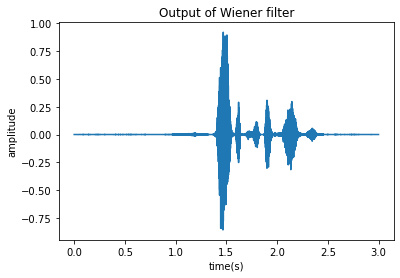

In [10]:
fr_len_in_arr = 0.025 * sr #win_length = 25ms
step1 = fr_len_in_arr - 0.5*fr_len_in_arr #overlap = win_length/2
nr_frames=int(len(source)//step1-1)
samples=len(source)

input_segments = np.zeros((nr_frames,int(sr*0.025)),dtype='complex_')
source_segment = np.zeros((nr_frames,int(sr*0.025)))
Y_f = np.zeros((nr_frames,int(sr*0.025)), dtype='complex_')
y_f=np.zeros((nr_frames,int(sr*0.025)),dtype='complex_')
output1=np.zeros((nr_frames,samples),dtype='complex_')

output_samples=int((nr_frames-1)*sr*0.0125 + sr*0.025)
final_output=np.zeros(output_samples,dtype='complex_')

window = scipy.signal.hamming(int(0.025*sr))
for i in range(nr_frames):
    input_segments[i,:]=output[int(i*0.0125*sr):int(i*0.0125*sr + 0.025*sr)]
    source_segment[i]=source[int(i*0.0125*sr):int(i*0.0125*sr + 0.025*sr)]
    f1, Pin = scipy.signal.welch(input_segments[i], sr, nfft=int(0.025*sr),scaling='spectrum',detrend=False,  return_onesided=False)
    f2, Ps = scipy.signal.welch(source_segment[i], sr, nfft=int(0.025*sr),scaling='spectrum',detrend=False,  return_onesided=False)

    H=Ps/Pin
    Y_f[i]=np.fft.fft(input_segments[i]*window) * H
    y_f[i,:] = np.fft.ifft(Y_f[i,:])


for i in range(nr_frames):
   #shifting to implement add-overlap 
    output1[i,int(i*0.0125*sr):int(i*0.0125*sr + 0.025*sr )] = y_f[i]
    
    
for j in range(output_samples):
    val=0
    for k in range(nr_frames):
      #overlapping every fs*win_length/2 samples
        val+=output1[k,j]
    final_output[j] = val
final_output=1.08*final_output/2  #scaling
plt.figure()
plt.title("Output of Wiener filter")
t1=np.linspace(0,output_samples//sr,output_samples)
plt.plot(t1,final_output,label="output of Wiener filter")
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()


2. Σχεδιάζουμε στην ίδια γραφική τις κυματομορφές για το καθαρό σήμα φωνής, το θορυβώδες σήμα στο κεντρικό μικρόφωνο της συστοιχίας, την είσοδο του Wiener φίλτρου και την έξοδο του Wiener φίλτρου. Στη συνέχεια, σχεδιάζουμε και τα σπεκτρογραφήματα.

C:\Users\30694\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\30694\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


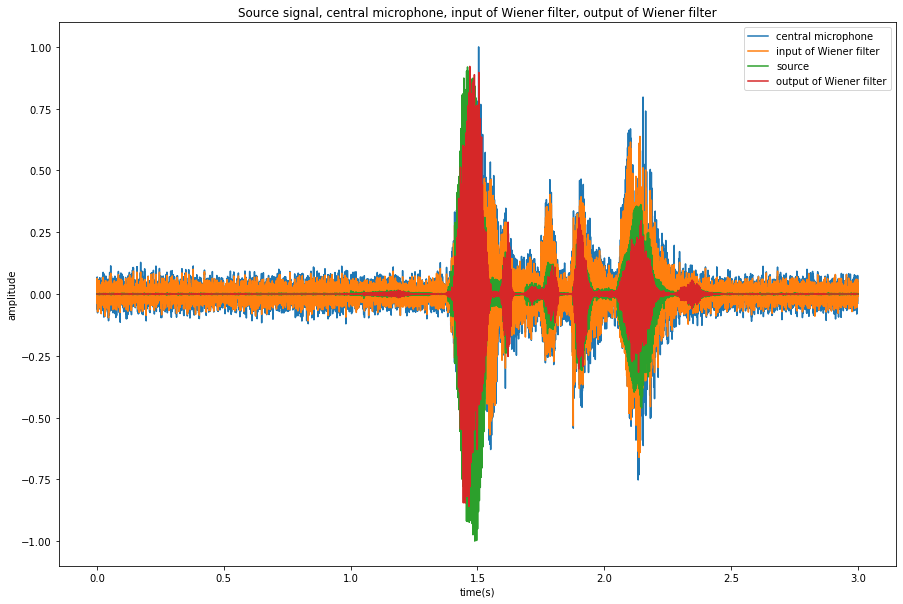

In [11]:
plt.figure(figsize=(15,10))
plt.title("Source signal, central microphone, input of Wiener filter, output of Wiener filter")
t=np.linspace(0,samples//sr, samples)
t1=np.linspace(0,output_samples//sr,output_samples)
plt.plot(t,sensor[3],label="central microphone")
plt.plot(t,output,label="input of Wiener filter")
plt.plot(t,source,label="source")
plt.plot(t1,final_output,label="output of Wiener filter")
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

<ipython-input-12-187f8f932b6f>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, f1, np.log10(Sxx1), shading='flat')


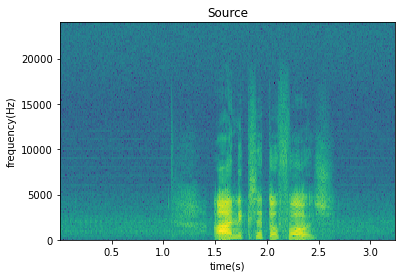

<ipython-input-12-187f8f932b6f>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t2, f2, np.log10(Sxx2), shading='flat')


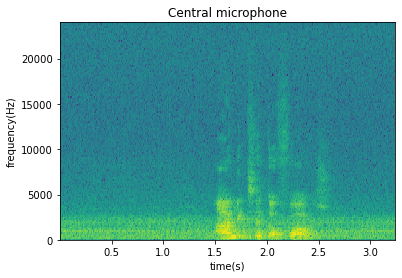

<ipython-input-12-187f8f932b6f>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t3, f3, np.log10(Sxx3), shading='flat')


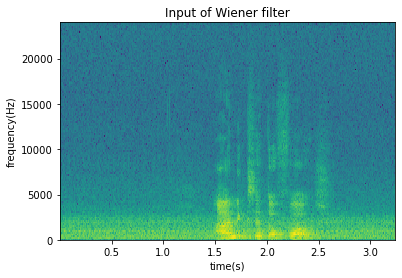

<ipython-input-12-187f8f932b6f>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t4, f4, np.log10(Sxx4), shading='flat')


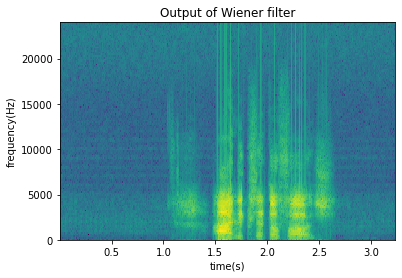

In [12]:
#spectrograms
plt.figure()
f1, t1, Sxx1 = scipy.signal.spectrogram(source, sr)
plt.pcolormesh(t1, f1, np.log10(Sxx1), shading='flat')
plt.title("Source")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

plt.figure()
f2, t2, Sxx2 = scipy.signal.spectrogram(sensor[3], sr)
plt.pcolormesh(t2, f2, np.log10(Sxx2), shading='flat')
plt.title("Central microphone")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

plt.figure()
f3, t3, Sxx3 = scipy.signal.spectrogram(output.real, sr)
plt.pcolormesh(t3, f3, np.log10(Sxx3), shading='flat')
plt.title("Input of Wiener filter")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

plt.figure()
f4, t4, Sxx4 = scipy.signal.spectrogram(final_output.real, sr)
plt.pcolormesh(t4, f4, np.log10(Sxx4), shading='flat')
plt.title("Output of Wiener filter")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

Παρατηρούμε ότι η έξοδος του Wiener φίλτρου είναι αρκετά κοντά στο αρχικό σήμα σε σχέση με την είσοδο του φίλτρου (δηλαδή την έξοδο του beamformer).

Η έξοδος του Wiener φίλτρου αποθηκεύεται στο αρχείο

In [13]:
sf.write('real_mmse.wav', final_output.real, 48000)

3. Βρίσκουμε τo SSNR της εισόδου (έξοδος του beamformer) και της εξόδου του Wiener φίλτρου:

In [14]:
#3
window = 0.02 * sr #20 ms
begin = int(0.2*sr)
end = int(0.2*sr+window)-1
noise_seg = sensor[3][begin:end]

nr_windows = int(np.floor(len(source)/window))

ssnr_input_wiener = ssnr(output.real,noise_seg,nr_windows,window)
print("SSNR of input of Wiener filter (output of beamformer) is: " +str(ssnr_input_wiener))
ssnr_output_wiener =  ssnr(final_output.real,noise_seg,nr_windows,window)
print("SSNR of output of Wiener filter is: " +str(ssnr_output_wiener))


SSNR of input of Wiener filter (output of beamformer) is: 2.9486770955856447
SSNR of output of Wiener filter is: 1.0720333669325497


4. Βρίσκουμε το SSNR των σημάτων που καταγράφει η συστοιχία των μικροφώνων:

In [15]:
#4
s=0
for i in range(7):
    s+=ssnr(sensor[i],noise_seg,nr_windows,window)
    
avg_inp_ssnr=s/7
print(avg_inp_ssnr)

3.6940836741177825
